In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv('dataset.csv')

In [3]:
data

,Unnamed: 0,Title,Year,Rating,Genres,User Reviews,Name,RT_review
0,0,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror",I personally didn't enjoy IT 2017 so I didn't ...,NaN,NaN
1,1,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror","I really, realllly wanted to like this film. A...",NaN,NaN
2,2,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror",I was originally hesitant to see director Andy...,NaN,NaN
3,3,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror",...it is a disgrace because it is a gross betr...,NaN,NaN
4,4,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror","Firstly, those people giving this a 9 and 10.....",NaN,NaN
...,...,...,...,...,...,...,...,...
81058,81058,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi","I don't mind weird films. Truly, I don't. But ...",NaN,NaN
81059,81059,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi",Most of us who are mindful of the film can agr...,NaN,NaN
81060,81060,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi",It was everything everywhere all at once. Some...,NaN,NaN
81061,81061,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi",There's a point here where we are swept up in ...,NaN,NaN


In [4]:
#Drop Columns which is irrelevant
data.drop(columns='Unnamed: 0', inplace=True)
data.drop(columns='Name', inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81063 entries, 0 to 81062
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         81063 non-null  object 
 1   Year          81063 non-null  int64  
 2   Rating        81063 non-null  float64
 3   Genres        81063 non-null  object 
 4   User Reviews  81063 non-null  object 
 5   RT_review     74046 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.7+ MB


In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Assuming you have your data in a DataFrame called 'df', and the text data is in a column named 'text'.

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment labels
def get_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'

# Calculate sentiment scores for each text
data['sentiment_score_imdb'] = data['User Reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Get sentiment labels
data['sentiment_imdb'] = data['sentiment_score_imdb'].apply(get_sentiment_label)


In [8]:
data

,Title,Year,Rating,Genres,User Reviews,RT_review,sentiment_score_imdb,sentiment_imdb
0,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror",I personally didn't enjoy IT 2017 so I didn't ...,NaN,-0.9853,Negative
1,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror","I really, realllly wanted to like this film. A...",NaN,-0.5616,Negative
2,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror",I was originally hesitant to see director Andy...,NaN,0.9834,Positive
3,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror",...it is a disgrace because it is a gross betr...,NaN,-0.9719,Negative
4,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror","Firstly, those people giving this a 9 and 10.....",NaN,-0.9543,Negative
...,...,...,...,...,...,...,...,...
81058,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi","I don't mind weird films. Truly, I don't. But ...",NaN,-0.0987,Negative
81059,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi",Most of us who are mindful of the film can agr...,NaN,0.9984,Positive
81060,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi",It was everything everywhere all at once. Some...,NaN,0.9982,Positive
81061,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi",There's a point here where we are swept up in ...,NaN,-0.6705,Negative


In [9]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Assuming you have your data in a DataFrame called 'df', and the text data is in a column named 'text'.

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment labels
def get_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'

# Convert empty strings in 'RT_review' column to a chosen value
data['RT_review'].fillna('', inplace=True)

# Calculate sentiment scores for each text
data['sentiment_score_rt'] = data['RT_review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Get sentiment labels
data['sentiment_rt'] = data['sentiment_score_rt'].apply(get_sentiment_label)


In [10]:
data

,Title,Year,Rating,Genres,User Reviews,RT_review,sentiment_score_imdb,sentiment_imdb,sentiment_score_rt,sentiment_rt
0,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror",I personally didn't enjoy IT 2017 so I didn't ...,,-0.9853,Negative,0.0,None
1,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror","I really, realllly wanted to like this film. A...",,-0.5616,Negative,0.0,None
2,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror",I was originally hesitant to see director Andy...,,0.9834,Positive,0.0,None
3,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror",...it is a disgrace because it is a gross betr...,,-0.9719,Negative,0.0,None
4,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror","Firstly, those people giving this a 9 and 10.....",,-0.9543,Negative,0.0,None
...,...,...,...,...,...,...,...,...,...,...
81058,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi","I don't mind weird films. Truly, I don't. But ...",,-0.0987,Negative,0.0,None
81059,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi",Most of us who are mindful of the film can agr...,,0.9984,Positive,0.0,None
81060,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi",It was everything everywhere all at once. Some...,,0.9982,Positive,0.0,None
81061,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi",There's a point here where we are swept up in ...,,-0.6705,Negative,0.0,None


In [11]:
chosen_value = 'No_review from rotten tomatoes'
data['RT_review'].replace('', chosen_value, inplace=True)

In [12]:
data

,Title,Year,Rating,Genres,User Reviews,RT_review,sentiment_score_imdb,sentiment_imdb,sentiment_score_rt,sentiment_rt
0,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror",I personally didn't enjoy IT 2017 so I didn't ...,No_review from rotten tomatoes,-0.9853,Negative,0.0,None
1,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror","I really, realllly wanted to like this film. A...",No_review from rotten tomatoes,-0.5616,Negative,0.0,None
2,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror",I was originally hesitant to see director Andy...,No_review from rotten tomatoes,0.9834,Positive,0.0,None
3,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror",...it is a disgrace because it is a gross betr...,No_review from rotten tomatoes,-0.9719,Negative,0.0,None
4,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror","Firstly, those people giving this a 9 and 10.....",No_review from rotten tomatoes,-0.9543,Negative,0.0,None
...,...,...,...,...,...,...,...,...,...,...
81058,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi","I don't mind weird films. Truly, I don't. But ...",No_review from rotten tomatoes,-0.0987,Negative,0.0,None
81059,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi",Most of us who are mindful of the film can agr...,No_review from rotten tomatoes,0.9984,Positive,0.0,None
81060,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi",It was everything everywhere all at once. Some...,No_review from rotten tomatoes,0.9982,Positive,0.0,None
81061,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi",There's a point here where we are swept up in ...,No_review from rotten tomatoes,-0.6705,Negative,0.0,None


In [13]:
# Function to compare sentiments and create the 'sentiment' column
def compare_sentiments(row):
    sentiment_rt = row['sentiment_rt']
    sentiment_imdb = row['sentiment_imdb']

    if sentiment_rt == 'Positive' and sentiment_imdb == 'Positive':
        return 'Positive'
    elif sentiment_rt == 'Positive' and sentiment_imdb == 'Negative':
        return 'Positive'
    elif sentiment_rt == 'Negative' and sentiment_imdb == 'Positive':
        return 'Positive'
    elif sentiment_rt == 'Negative' and sentiment_imdb == 'Negative':
        return 'Negative'
    elif sentiment_rt == 'Positive':
        return 'Positive'
    elif sentiment_rt == 'Negative':
        return 'Negative'
    else:
        return sentiment_imdb

# Create the 'sentiment' column by applying the compare_sentiments function
data['sentiment'] = data.apply(compare_sentiments, axis=1)

In [14]:
data


,Title,Year,Rating,Genres,User Reviews,RT_review,sentiment_score_imdb,sentiment_imdb,sentiment_score_rt,sentiment_rt,sentiment
0,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror",I personally didn't enjoy IT 2017 so I didn't ...,No_review from rotten tomatoes,-0.9853,Negative,0.0,None,Negative
1,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror","I really, realllly wanted to like this film. A...",No_review from rotten tomatoes,-0.5616,Negative,0.0,None,Negative
2,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror",I was originally hesitant to see director Andy...,No_review from rotten tomatoes,0.9834,Positive,0.0,None,Positive
3,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror",...it is a disgrace because it is a gross betr...,No_review from rotten tomatoes,-0.9719,Negative,0.0,None,Negative
4,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror","Firstly, those people giving this a 9 and 10.....",No_review from rotten tomatoes,-0.9543,Negative,0.0,None,Negative
...,...,...,...,...,...,...,...,...,...,...,...
81058,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi","I don't mind weird films. Truly, I don't. But ...",No_review from rotten tomatoes,-0.0987,Negative,0.0,None,Negative
81059,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi",Most of us who are mindful of the film can agr...,No_review from rotten tomatoes,0.9984,Positive,0.0,None,Positive
81060,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi",It was everything everywhere all at once. Some...,No_review from rotten tomatoes,0.9982,Positive,0.0,None,Positive
81061,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi",There's a point here where we are swept up in ...,No_review from rotten tomatoes,-0.6705,Negative,0.0,None,Negative


In [15]:
data.drop(columns='sentiment_score_rt', inplace=True)
data.drop(columns='sentiment_score_imdb', inplace=True)

In [16]:
data

,Title,Year,Rating,Genres,User Reviews,RT_review,sentiment_imdb,sentiment_rt,sentiment
0,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror",I personally didn't enjoy IT 2017 so I didn't ...,No_review from rotten tomatoes,Negative,None,Negative
1,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror","I really, realllly wanted to like this film. A...",No_review from rotten tomatoes,Negative,None,Negative
2,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror",I was originally hesitant to see director Andy...,No_review from rotten tomatoes,Positive,None,Positive
3,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror",...it is a disgrace because it is a gross betr...,No_review from rotten tomatoes,Negative,None,Negative
4,It Chapter Two,2019,6.5,"Drama, Fantasy, Horror","Firstly, those people giving this a 9 and 10.....",No_review from rotten tomatoes,Negative,None,Negative
...,...,...,...,...,...,...,...,...,...
81058,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi","I don't mind weird films. Truly, I don't. But ...",No_review from rotten tomatoes,Negative,None,Negative
81059,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi",Most of us who are mindful of the film can agr...,No_review from rotten tomatoes,Positive,None,Positive
81060,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi",It was everything everywhere all at once. Some...,No_review from rotten tomatoes,Positive,None,Positive
81061,Everything Everywhere All at Once,2022,7.8,"Action, Adventure, Comedy, Fantasy, Sci-Fi",There's a point here where we are swept up in ...,No_review from rotten tomatoes,Negative,None,Negative


<Axes: xlabel='sentiment', ylabel='count'>

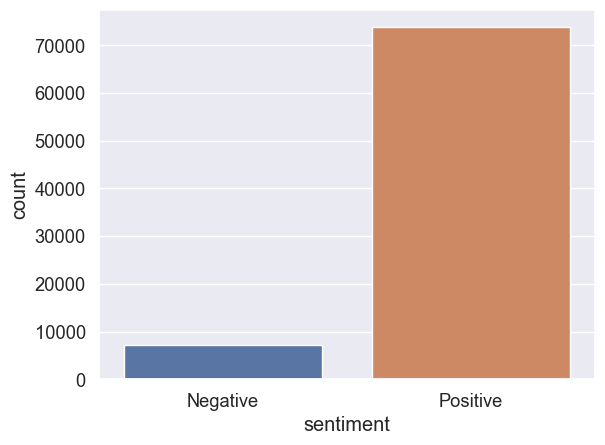

In [17]:
import seaborn as sns
import pandas as pd

# Assuming you have already performed sentiment analysis and added the 'sentiment_label_rt' column to data.
# If you haven't, make sure you have followed the previous steps to add 'sentiment_label_rt' based on 'sentiment_score_rt'.

# Convert the 'sentiment_label_rt' column to a categorical data type
data['sentiment'] = data['sentiment'].astype('category')

sns.set(style="darkgrid", font_scale=1.2)
sns.countplot(data=data, x='sentiment')


<Axes: xlabel='sentiment_imdb', ylabel='count'>

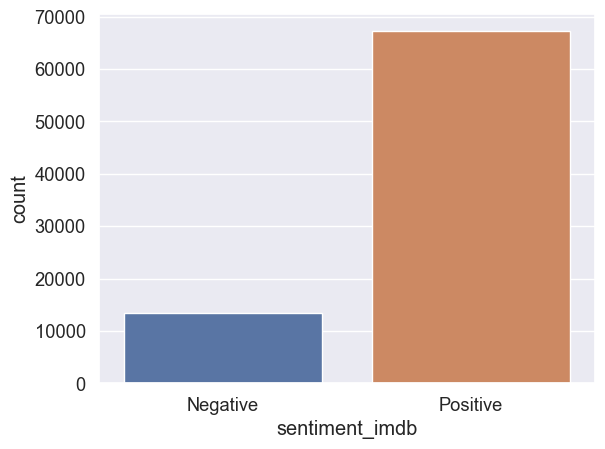

In [18]:
# Convert the 'sentiment_label_rt' column to a categorical data type
data['sentiment_imdb'] = data['sentiment_imdb'].astype('category')

sns.set(style="darkgrid", font_scale=1.2)
sns.countplot(data=data, x='sentiment_imdb')

<Axes: xlabel='sentiment_rt', ylabel='count'>

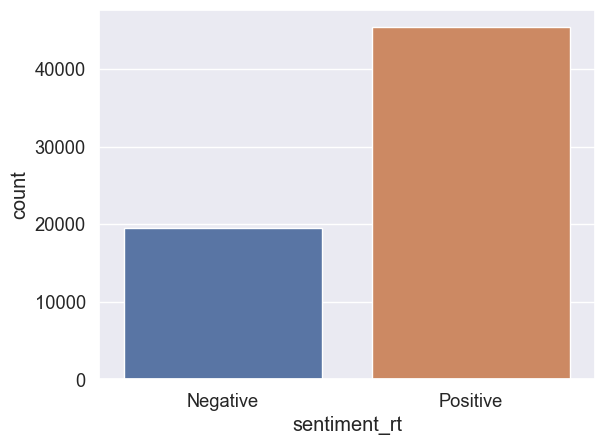

In [19]:
# Convert the 'sentiment_label_rt' column to a categorical data type
data['sentiment_rt'] = data['sentiment_rt'].astype('category')

sns.set(style="darkgrid", font_scale=1.2)
sns.countplot(data=data, x='sentiment_rt')

In [20]:
data.isna().sum()

Title                 0
Year                  0
Rating                0
Genres                0
User Reviews          0
RT_review             0
sentiment_imdb      406
sentiment_rt      16150
sentiment            59
dtype: int64

In [21]:
# Remove rows with missing values (NaN) from the DataFrame
data_cleaned = data.dropna()

# Print the shape of the cleaned data to verify the removal
print("Cleaned data shape:", data_cleaned.shape)

Cleaned data shape: (64566, 9)


In [22]:
data_cleaned.isna().sum()

Title             0
Year              0
Rating            0
Genres            0
User Reviews      0
RT_review         0
sentiment_imdb    0
sentiment_rt      0
sentiment         0
dtype: int64

C:\Users\akash\AppData\Local\Temp\ipykernel_24992\2899525174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['sentiment'] = data_cleaned['sentiment'].astype('category')


<Axes: xlabel='sentiment', ylabel='count'>

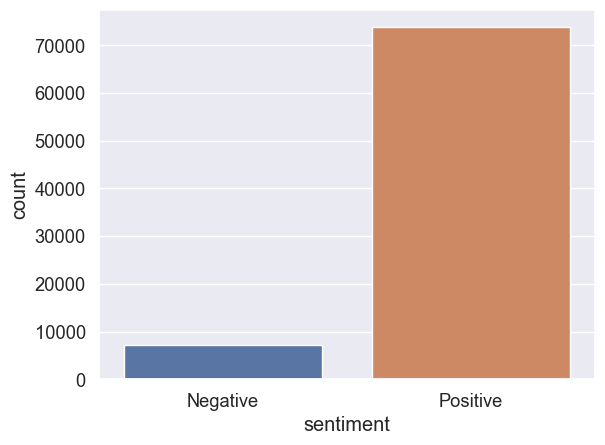

In [23]:
# Convert the 'sentiment_label_rt' column to a categorical data type
data_cleaned['sentiment'] = data_cleaned['sentiment'].astype('category')

sns.set(style="darkgrid", font_scale=1.2)
sns.countplot(data=data, x='sentiment')

C:\Users\akash\AppData\Local\Temp\ipykernel_24992\1039293369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['sentiment_rt'] = data_cleaned['sentiment_rt'].astype('category')


<Axes: xlabel='sentiment_rt', ylabel='count'>

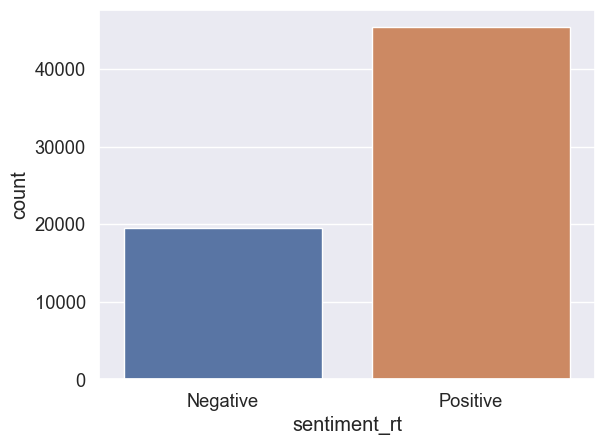

In [24]:
# Convert the 'sentiment_label_rt' column to a categorical data type
data_cleaned['sentiment_rt'] = data_cleaned['sentiment_rt'].astype('category')

sns.set(style="darkgrid", font_scale=1.2)
sns.countplot(data=data, x='sentiment_rt')

In [25]:
import string
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [27]:
from bs4 import BeautifulSoup
import re
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on imdb review column
data_cleaned['User Reviews']=data_cleaned['User Reviews'].apply(denoise_text)

C:\Users\akash\AppData\Local\Temp\ipykernel_24992\3994014714.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
C:\Users\akash\AppData\Local\Temp\ipykernel_24992\3994014714.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['User Reviews']=data_cleaned['User Reviews'].apply(denoise_text)


In [28]:
data_cleaned.sentiment_imdb.replace("Positive" , 1 , inplace = True)
data_cleaned.sentiment_imdb.replace("Negative" , 0 , inplace = True)
data_cleaned.head()


C:\Users\akash\AppData\Local\Temp\ipykernel_24992\1714801784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.sentiment_imdb.replace("Positive" , 1 , inplace = True)
C:\Users\akash\AppData\Local\Temp\ipykernel_24992\1714801784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.sentiment_imdb.replace("Negative" , 0 , inplace = True)


,Title,Year,Rating,Genres,User Reviews,RT_review,sentiment_imdb,sentiment_rt,sentiment
10,The Departed,2006,8.5,"Crime, Drama, Thriller",departed finally gained martin scorsese best d...,Martin Scorsese’s adaptation of the Hong Kong ...,1,Positive,Positive
12,The Departed,2006,8.5,"Crime, Drama, Thriller",departed finally gained martin scorsese best d...,"If you like Scorsese, or if you just like thri...",1,Positive,Positive
14,The Departed,2006,8.5,"Crime, Drama, Thriller",departed finally gained martin scorsese best d...,Not only is The Departed not among the best of...,1,Negative,Positive
15,The Departed,2006,8.5,"Crime, Drama, Thriller",departed finally gained martin scorsese best d...,Nicholson is on good-to-great form as the pate...,1,Positive,Positive
16,The Departed,2006,8.5,"Crime, Drama, Thriller",departed finally gained martin scorsese best d...,"One of the best crime dramas ever made, The De...",1,Positive,Positive


In [29]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


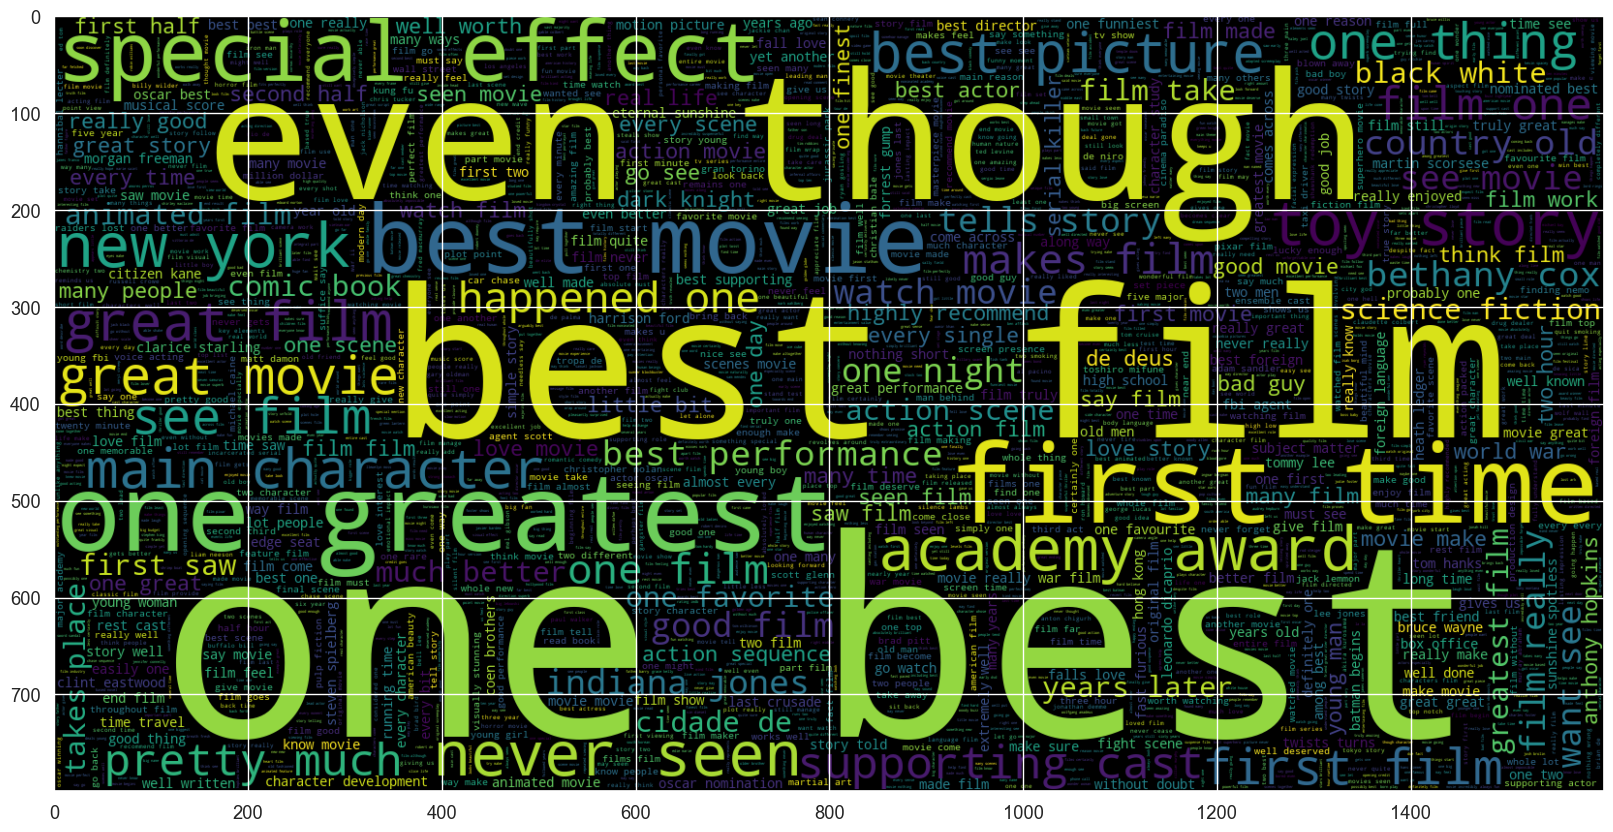

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(20, 20))  # Positive Review Text
wc = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(data_cleaned[data_cleaned.sentiment_imdb == 1]['User Reviews']))
plt.imshow(wc, interpolation='bilinear')

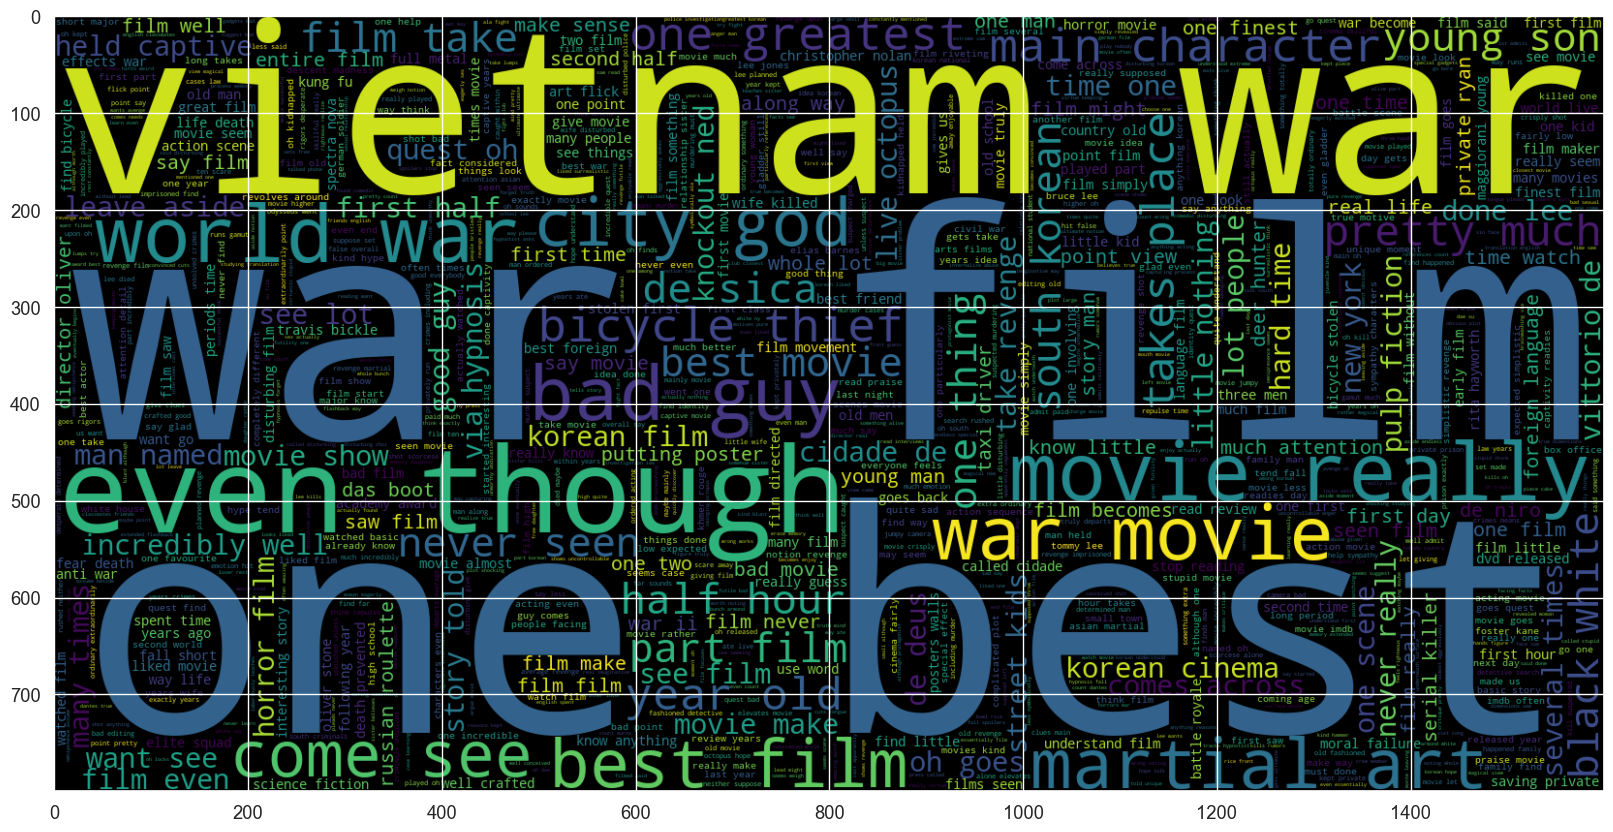

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(20, 20))  # Positive Review Text
wc = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(data_cleaned[data_cleaned.sentiment_imdb == 0]['User Reviews']))
plt.imshow(wc, interpolation='bilinear')

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split

train, test= train_test_split(data_cleaned, test_size=0.2, random_state=42)
Xtrain, ytrain = train['User Reviews'], train['sentiment_imdb']
Xtest, ytest = test['User Reviews'], test['sentiment_imdb']
#splitting the train set into train and validation
Xtrain,Xval,ytrain,yval=train_test_split(Xtrain,ytrain,
                                             test_size=0.2,random_state=10)

In [37]:
pip install tokenizers


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install transformers


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [65]:
import transformers
from tokenizers import BertWordPieceTokenizer
#Perform tokenization
# automatically download the vocab used during pretraining or fine-tuning a given model,use from_pretrained() method
tokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased')

In [52]:
from keras.preprocessing.text import Tokenizer


In [41]:
pip install keras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [66]:
#set up the tokenizer
MAX_VOCAB_SIZE = 10000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE,oov_token="<oov>")
tokenizer.fit_on_texts(Xtrain)
word_index = tokenizer.word_index
#print(word_index)
V = len(word_index)
print("Vocabulary of the dataset is : ",V)

Vocabulary of the dataset is :  33856


In [43]:
##create sequences of reviews
seq_train = tokenizer.texts_to_sequences(Xtrain)
seq_test =  tokenizer.texts_to_sequences(Xtest)

In [44]:
#choice of maximum length of sequences
seq_len_list = [len(i) for i in seq_train + seq_test]

#if we take the direct maximum then
max_len=max(seq_len_list)
print('Maximum length of sequence in the list: {}'.format(max_len))

Maximum length of sequence in the list: 651


In [45]:
# when setting the maximum length of sequence, variability around the average is used.
max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
max_seq_len = int(max_seq_len)
print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))

Maximum length of the sequence when considering data only two standard deviations from average: 332


In [46]:
perc_covered = np.sum(np.array(seq_len_list) < max_seq_len) / len(seq_len_list)*100
print('The above calculated number coveres approximately {} % of data'.format(np.round(perc_covered,2)))

The above calculated number coveres approximately 93.65 % of data


In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming you have already initialized the 'tokenizer' object from TensorFlow
# and defined 'max_seq_len'

# Create a tokenizer and fit on the training data
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<oov>")
tokenizer.fit_on_texts(Xtrain)

# Convert text data to sequences of integers
Xtrain_enc = tokenizer.texts_to_sequences(Xtrain)
Xval_enc = tokenizer.texts_to_sequences(Xval)

# Pad the sequences to the desired length using pad_sequences from Keras
input_ids_train = pad_sequences(Xtrain_enc, maxlen=max_seq_len, padding='post', truncating='post')
input_ids_val = pad_sequences(Xval_enc, maxlen=max_seq_len, padding='post', truncating='post')

# If you have labels or targets, you can convert them to numpy arrays as well
# Assuming you have labels stored in 'y_train' and 'y_val'
import numpy as np
ytrain = np.array(ytrain)
yval = np.array(yval)


In [49]:
import transformers
print(transformers.__version__)

4.31.0


In [51]:
from transformers import BertTokenizer
import numpy as np

# Create a new tokenizer using the Hugging Face BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Assuming you have already defined 'max_seq_len'
max_seq_len = 128  # Define it according to your needs

# Encode the text data using the tokenizer
def encode_text(text_list, max_seq_len):
    encodings = tokenizer(text_list, truncation=True, padding='max_length', max_length=max_seq_len, return_tensors='np')
    return encodings['input_ids'], encodings['attention_mask']

Xtrain_ids, Xtrain_masks = encode_text(Xtrain.tolist(), max_seq_len)
Xval_ids, Xval_masks = encode_text(Xval.tolist(), max_seq_len)
Xtest_ids, Xtest_masks = encode_text(Xtest.tolist(), max_seq_len)

# Convert labels to numpy arrays
ytrain = np.array(ytrain)
yval = np.array(yval)


In [53]:
import tensorflow as tf

# Preparing our datasets
train_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': Xtrain_ids, 'attention_mask': Xtrain_masks}, ytrain))
val_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': Xval_ids, 'attention_mask': Xval_masks}, yval))
test_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': Xtest_ids, 'attention_mask': Xtest_masks}, ytest))


In [54]:
def bert_model(train_dataset, val_dataset, transformer, max_len, epochs):
    print("----Building the model----")
    input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(max_len,),dtype=tf.int32,name = 'attention_mask') #attention mask
    
    # Combine inputs into a dictionary
    inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}
    sequence_output = transformer(inputs)[0]
    
    cls_token = sequence_output[:, 0, :]
    x = Dense(512, activation='relu')(cls_token)
    x = Dropout(0.1)(x)
    y = Dense(1, activation='sigmoid')(x)
    
    # Pass the dictionary as inputs to the model
    model = Model(inputs=inputs, outputs=y)
    
    model.summary()
    model.compile(Adam(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])
    r = model.fit(train_dataset.batch(32), batch_size=32, validation_data=val_dataset.batch(32), epochs=epochs)
    
    print("Train score:", model.evaluate(train_dataset.batch(32)))
    print("Validation score:", model.evaluate(val_dataset.batch(32)))
    n_epochs = len(r.history['loss'])

    return r, model, n_epochs


In [55]:
transformer = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [56]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [57]:
epochs = 2
max_len = max_seq_len
r,model,n_epochs = bert_model(train_dataset,val_dataset,transformer,max_len,epochs)

----Building the model----
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 attention_mask (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 tf_distil_bert_model (TFDi  TFBaseModelOutput(last_hid   6636288   ['attention_mask[0][0]',      
 stilBertModel)              den_state=(None, 128, 768)   0          'input_ids[0][0]']           
                             , hidden_states=None, atte            

Epoch 1/2
1292/1292 [==============================] - 10966s 8s/step - loss: 0.4601 - accuracy: 0.8313 - val_loss: 0.4514 - val_accuracy: 0.8330
Epoch 2/2
1292/1292 [==============================] - 3126s 2s/step - loss: 0.4559 - accuracy: 0.8324
Train score: [0.45589056611061096, 0.8323854804039001]
323/323 [==============================] - 779s 2s/step - loss: 0.4547 - accuracy: 0.8330
Validation score: [0.45470932126045227, 0.8330268263816833]


In [58]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(test_dataset.batch(32))
print(dict(zip(model.metrics_names, result)))

Evaluate Model Performance on Test set
404/404 [==============================] - 989s 2s/step - loss: 0.4425 - accuracy: 0.8396
{'loss': 0.4425398111343384, 'accuracy': 0.8396313786506653}


404/404 [==============================] - 978s 2s/step


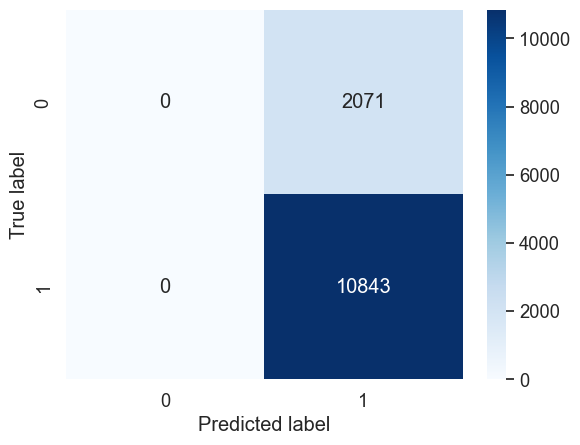

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#Generate predictions for the test dataset
ypred = model.predict(test_dataset.batch(32))
ypred = ypred>0.5
#Get the confusion matrix
cf_matrix = confusion_matrix(ytest, ypred)
sns.heatmap(cf_matrix,annot = True,fmt ='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()